In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from pylab import savefig
import seaborn as sns

#using isolation forest to determine outliers in the data.
Weather the outliers follows the normal dist in the training set.We will use scatter plot for this.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rng=np.random.RandomState(42)

In [5]:
rng

In [29]:
xtrain=0.2*rng.randn(1000,2)

In [30]:
xtrain.shape

(1000, 2)

In [31]:
xtrain

array([[ 0.15308043,  0.21468254],
       [ 0.09973798, -0.38849954],
       [-0.03108449, -0.23114151],
       ...,
       [-0.26249774,  0.04828182],
       [ 0.06505034,  0.23585263],
       [ 0.158228  , -0.05695911]])

In [32]:
#here it concatenated by row
xtrain2=np.r_[xtrain+3,xtrain]

In [37]:
xtrain2.shape

(2000, 2)

In [21]:
a = np.arange(9).reshape(3,3)
b = np.arange(10,19).reshape(3,3)

In [22]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [23]:
b

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [25]:
sliced_arrAY=np.concatenate([a[1,1:3],b[1,1:3]],axis=0)

In [26]:
sliced_arrAY

array([ 4,  5, 14, 15])

In [28]:
np.r_[a[1,1:3],b[1,1:3]]

array([ 4,  5, 14, 15])

In [35]:
xtrain2=pd.DataFrame(xtrain2,columns=["x1","x2"])

In [38]:
xtrain2.head()

,x1,x2
0,3.153080,3.214683
1,3.099738,2.611500
2,2.968916,2.768858
3,2.959479,3.196001
4,3.061030,3.229618


In [126]:
xtest=rng.randn(200,2)

In [127]:
xtest=np.r_[xtest+3,xtest]

In [128]:
xtest=pd.DataFrame(xtest,columns=["x1","x2"])

In [129]:
xtest.head()

,x1,x2
0,3.895851,3.091480
1,2.893868,2.523801
2,3.166019,3.996463
3,3.888940,3.353394
4,3.599644,4.271697


In [134]:
#generating ouliers
outliers=rng.uniform(low=-1,high=5, size=(50,2))

(array([3., 1., 6., 5., 5., 5., 7., 5., 7., 6.]),
 array([-0.99400605, -0.39502576,  0.20395453,  0.80293482,  1.40191511,
         2.0008954 ,  2.59987569,  3.19885599,  3.79783628,  4.39681657,
         4.99579686]),
 <a list of 10 Patch objects>)

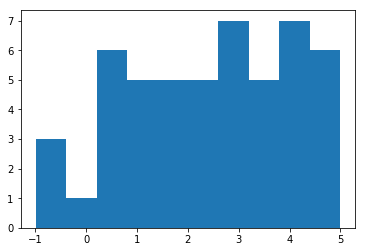

In [133]:
plt.hist(outliers)

In [136]:
xtest.shape

(400, 2)

In [137]:
out=pd.DataFrame(outliers,columns=["x1","x2"])

Figure 2 presents the generated dataset. As desired, training and ‘normal’ observations are basically stacked on each other, while outliers are spread over. Due to random nature of the outliers some of them are overlapping with the training/normal observations

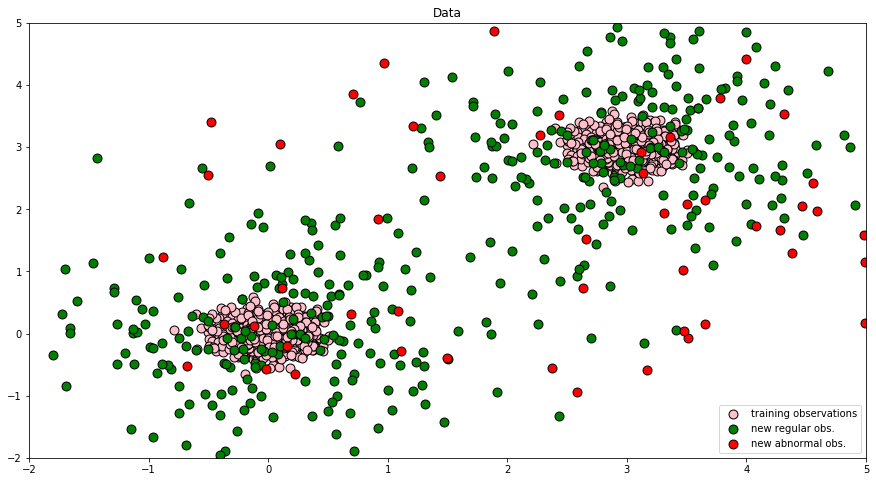

In [138]:
plt.figure(figsize=[15,8])
plt.title("Data")

p1 = plt.scatter(xtrain2.x1, xtrain2.x2, c='pink',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(xtest.x1, xtest.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(out.x1, out.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=300)

plt.show()

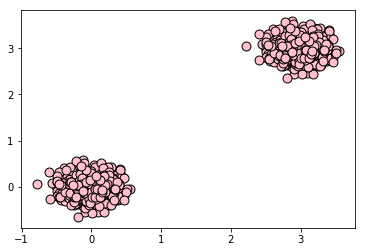

In [139]:
plt.scatter(xtrain2.x1,xtrain2.x2,s=20*4,edgecolors="black",c="pink")

In [140]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(xtrain2)

# predictions
y_pred_train = clf.predict(xtrain2)
y_pred_test = clf.predict(xtest)
y_pred_outliers = clf.predict(out)

In [141]:
#the accuarcy
list(y_pred_test).count(1)/y_pred_test.shape[0]

0.1125

In [142]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy: 0.1125


In [143]:
#outliers
list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]

0.88

At first this looks pretty good, especially considering the default settings, however, there is one issue still to consider. As the outlier data was generated randomly, some of the outliers are actually located within the normal observations. To inspect it more carefully, I will plot the normal observation dataset together with labeled outlier set. We can see that some of the outliers lying within the normal observation sets were correctly classified as regular observations, with a few of them being misclassified. 

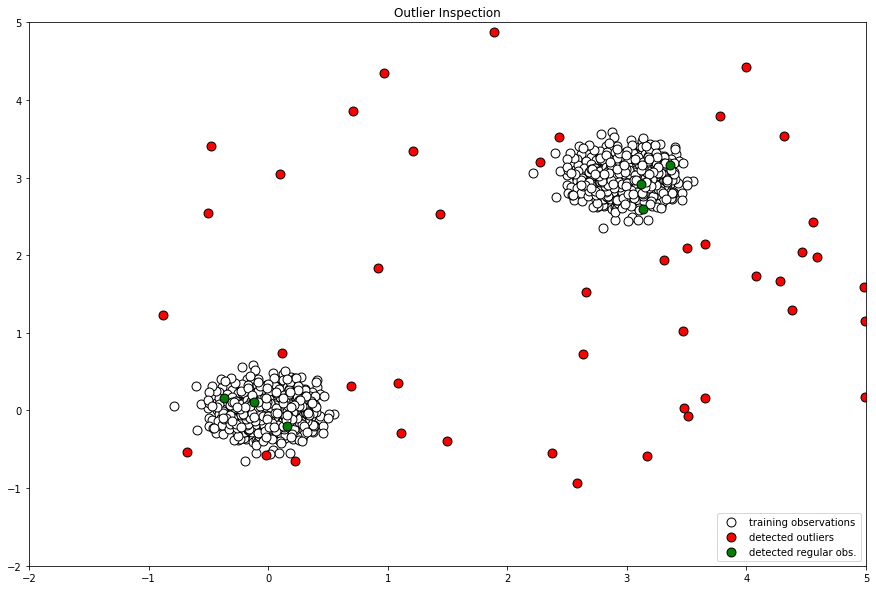

In [144]:
# Inspecting the outliers ----

# adding the predicted label
plt.figure(figsize=[15,10])
X_outliers = out.assign(y = y_pred_outliers)

plt.title("Outlier Inspection")

p1 = plt.scatter(xtrain2.x1, xtrain2.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()

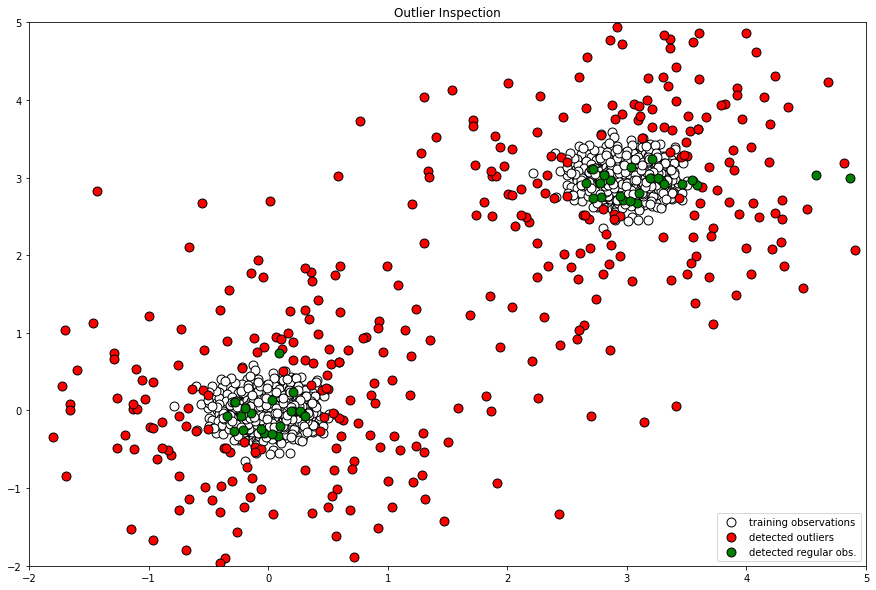

In [146]:
# Inspecting the outliers ----

# adding the predicted label
plt.figure(figsize=[15,10])
X_test = xtest.assign(y = y_pred_test)

plt.title("Outlier Inspection")

p1 = plt.scatter(xtrain2.x1, xtrain2.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.loc[X_test.y == -1, ['x1']], 
                 X_test.loc[X_test.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_test.loc[X_test.y == 1, ['x1']], 
                 X_test.loc[X_test.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()

for more info and indepth knowledge on prominent ways of determining outliers,
you can vsiit my linkedin articles where i have mentioned it thoroughly.

# How can we visualise decision tree in Python

Here i took an dataset which is based on  weather a person should play or not on the basis of few features on the data.

In [91]:
b=pd.read_csv("C://Users//abhis//Downloads//Baseketball Decision Tree.csv")

In [92]:
b.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [93]:
b.shape

(14, 5)

In [94]:
b.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [96]:
b.play=le.fit_transform(b.play)

In [102]:
df=pd.get_dummies(b.drop("play",axis=1),drop_first=True)

In [103]:
df.head()

,windy,outlook_rainy,outlook_sunny,temp_hot,temp_mild,humidity_normal
0,False,0,1,1,0,0
1,True,0,1,1,0,0
2,False,0,0,1,0,0
3,False,1,0,0,1,0
4,False,1,0,0,0,1


In [104]:
df.windy=le.fit_transform(df.windy)

In [105]:
df.head()

,windy,outlook_rainy,outlook_sunny,temp_hot,temp_mild,humidity_normal
0,0,0,1,1,0,0
1,1,0,1,1,0,0
2,0,0,0,1,0,0
3,0,1,0,0,1,0
4,0,1,0,0,0,1


In [106]:
x=df
y=b.play

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [115]:
dtree=tree.DecisionTreeClassifier()

In [117]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
with open("play_classifier.txt", "w") as f:
    f = tree.export_graphviz(dtree, out_file=f)

this will save ur file in the local directory

In [119]:
#direct go to the webgraphviz portal and paste ur notepad script accordingly.U will see a beautiful representation of the same.